In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Import data

In [2]:
my_songs = pd.read_csv('..//data//my_spotify_tracks.csv')

Below are descriptions of music features and its value types

| Music Feature| Description | Value type | Range |
| --- | --- | --- | --- |
| Danceability | How suitable a track is for dancing based on combination of musical elements  | float | [0.0, 1.0] |
| Energy | Perceptual measure of intensity and activity: feel fast, loud and noisy | float | [0.0, 1.0] |
| Key | Estimated overall key of the catch; mapped using pitch class notation | int | [0, 11] |
| Loudness | Overall loudness of a track in decibles (dB); relative loudness | float | [-60.0, 0.0 ] |
| Mode | Indicates the modality (major or minor) of a track | int | {0: minor, 1: minor} |
| Acousticness | Confidence measure whether the track is acoustic | float | [0.0, 1.0] |
| Instrumentalness | Predicts whether a track contains no vocals | float | [0.0, 1.0] |
| Liveness | Detects presence of an audience in the recording | float | [0.0, 1.0] |
| Valence | Musical positveness conveyed by a track (e.g happy, cheerful) | float | [0.0, 1.0] |
| Tempo | Overall estimated tempo/speed of a track in beats per minute (BPM) | float |[0, 220] |
| Duration ms | Duration of the song in milliseconds | int | number |
| Time signature | Estimate how many beats are in each bar (or measure) | int | number |

## Data Exploration


Let's explore the music features

In [14]:
music_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                  'acousticness', 'instrumentalness', 'liveness', 
                  'valence', 'tempo', 'duration_ms', 'time_signature']

In [9]:
def min_max(x):
    """
    Determine the minimum and maximum values of a column
    
    """
    
    result = pd.Series(index =['min', 'max'], data = [x.min(), x.max()])
    
    return result

In [17]:
my_songs[music_features].apply(min_max)

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
min,0.232,0.121,0,-20.994,0,0.000282,0.000,0.0215,0.0818,67.339,80150,1
max,0.950,0.979,11,-0.357,1,0.955000,0.908,0.7370,0.9530,207.200,380560,4


### Normalize features

Most music features are measured between 0 and 1, the exceptions are loudness and tempo. To reduce the misclassification when we fit the data into a model, we want to normalizing these two features.

In [93]:
# Feature: loudness
loudness = my_songs[['loudness']]
min_max_scalar = preprocessing.MinMaxScaler()

loudness = min_max_scalar.fit_transform(loudness)
my_songs['loudness_norm'] = loudness


# Feature: tempo
tempo = my_songs[['tempo']]
tempo = min_max_scalar.fit_transform(tempo)
my_songs['tempo_norm'] = tempo

Add normalized features to the list of music of features

In [94]:
music_features.append(['loudness_norm', 'tempo_norm'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5354234d0>,
      dtype=object)

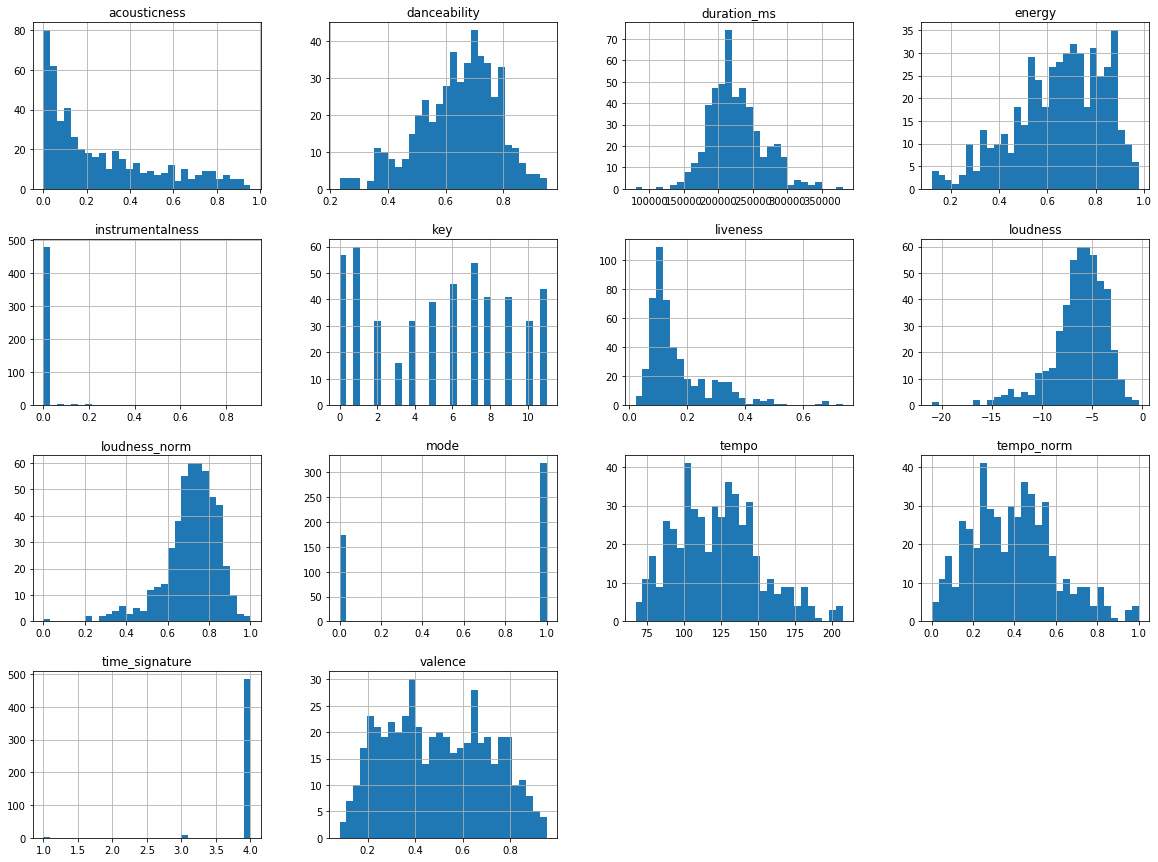

In [96]:
my_songs.hist(bins = 30, figsize = (20,15)) # Histrogram illustrations

Based on rational thought, some of these features may not be useful in determining the mood of a song: features such as duration of the song.

I will make a new list of music featuers in which can be used to determine how many groups (clusters) we want in our mood prediction

In [97]:
new_music_features = ['danceability',
                     'energy',
                     'key',
                     'mode',
                     'acousticness',
                     'instrumentalness',
                     'liveness',
                     'valence',
                     'tempo',
                     'time_signature',
                     'loudness_norm']

songs_features = my_songs[new_music_features]

### Cluster

Now that there is data, the data needs to be grouped so that the number of moods can be determined.

In [131]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state = 42)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [132]:
sil_score_max = 0

for n_clusters in range(2,10):
    model = KMeans(n_clusters = n_clusters, init='k-means++', max_iter=1000)
    labels = model.fit_predict(songs_features)
    sil_score = silhouette_score(songs_features, labels)
    print("The average silhouette score for %i clusters is %0.4f" %(n_clusters,sil_score))
    if sil_score >= sil_score_max:
        sil_score_max = sil_score
        best_n_clusters = n_clusters

The average silhouette score for 2 clusters is 0.5542
The average silhouette score for 3 clusters is 0.5582
The average silhouette score for 4 clusters is 0.4959
The average silhouette score for 5 clusters is 0.4765
The average silhouette score for 6 clusters is 0.4620
The average silhouette score for 7 clusters is 0.4351
The average silhouette score for 8 clusters is 0.4245
The average silhouette score for 9 clusters is 0.4240


In [140]:
range_n_clusters = list(range(2, 10))

elbow_method = []
ss = []

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)
    cluster_labels = clusterer.fit_predict(song_features)
    
    silhouette_avg = silhouette_score(song_features, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
 
    elbow_method.append(clusterer.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.5787859202953796
For n_clusters = 3 The average silhouette_score is : 0.5307697810743884
For n_clusters = 4 The average silhouette_score is : 0.5320750123277677
For n_clusters = 5 The average silhouette_score is : 0.5321909522479511
For n_clusters = 6 The average silhouette_score is : 0.5509723564170173
For n_clusters = 7 The average silhouette_score is : 0.5525459623428562
For n_clusters = 8 The average silhouette_score is : 0.5527183935924969
For n_clusters = 9 The average silhouette_score is : 0.5562157202583456


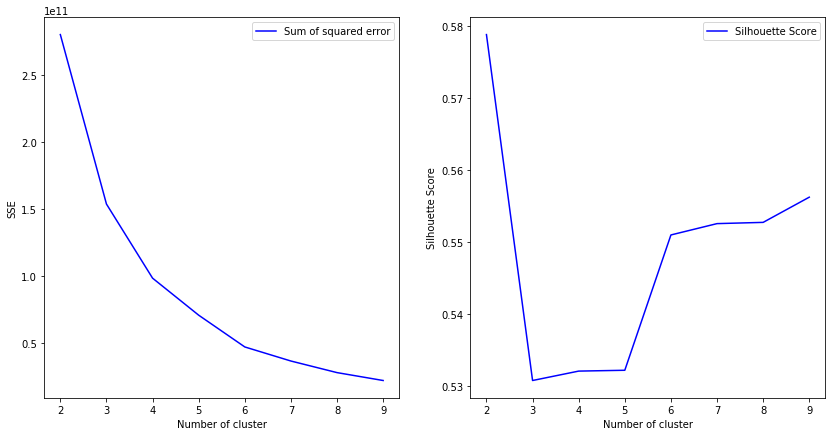

In [143]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, elbow_method,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()